In [62]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

## Load dataframe

In [2]:
df_cane = pd.read_excel('./data/cane_result_20230426.xlsx')

In [5]:
df_cane.describe().T

,count,mean,std,min,25%,50%,75%,max
pre-prof,60.0,22.670833,1.874360,17.375,21.37500,22.7500,24.00000,26.875
post-prof,60.0,23.341667,1.890524,18.625,21.93750,23.5000,24.62500,27.625
pre-fel,60.0,22.075000,1.931178,17.000,20.50000,22.2500,23.31250,26.000
post-fel,60.0,22.679167,1.980889,17.500,21.00000,22.7500,24.00000,27.000
pre-resi,60.0,23.708333,1.652660,19.625,22.75000,23.6250,25.03125,27.000
post-resi,60.0,23.091667,1.648199,18.500,22.09375,22.9375,24.28125,26.625
algorithm,60.0,22.716667,2.401212,17.000,21.00000,23.0000,24.00000,29.000


## 각 개별 그룹에서, cane노출 전/후 점수 차이에 대한 유의성 분석
- paired t-test (독립표본이 아님)

In [51]:
# "cane에 노출되는 것이 효과가 있다"는 것을 검정
# alternative='less'로 설정함 : 첫번째 파라미터로 들어오는 인자의 값이 크다
# ‘less’: the mean of the distribution underlying the first sample is less than 
# the mean of the distribution underlying the second sample.

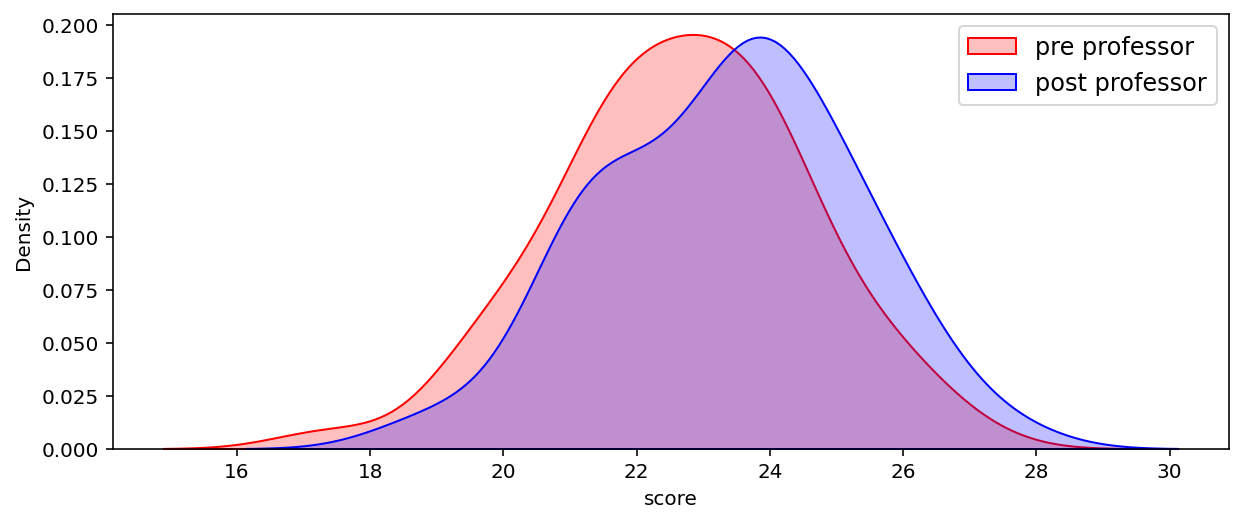

In [76]:
plt.figure(figsize=(10, 4))

sns.kdeplot(df_cane['pre-prof'], color='red', shade=True, label='pre professor')
sns.kdeplot(df_cane['post-prof'], color='blue', shade=True, label='post professor')
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('score')
plt.show()

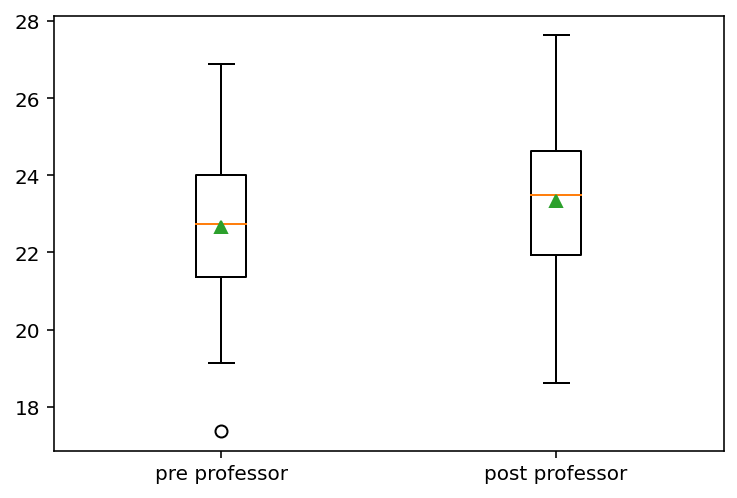

In [52]:
plt.boxplot([df_cane['pre-prof'], df_cane['post-prof']], showmeans=True)
plt.xticks([1, 2], ['pre professor', 'post professor'])
plt.show()

In [53]:
stat, p_val = stats.ttest_rel(df_cane['pre-prof'], df_cane['post-prof'], alternative='less')
print('statistic:', stat, '   p-value:', p_val)

statistic: -11.110503880233214    p-value: 2.1478017485587334e-16


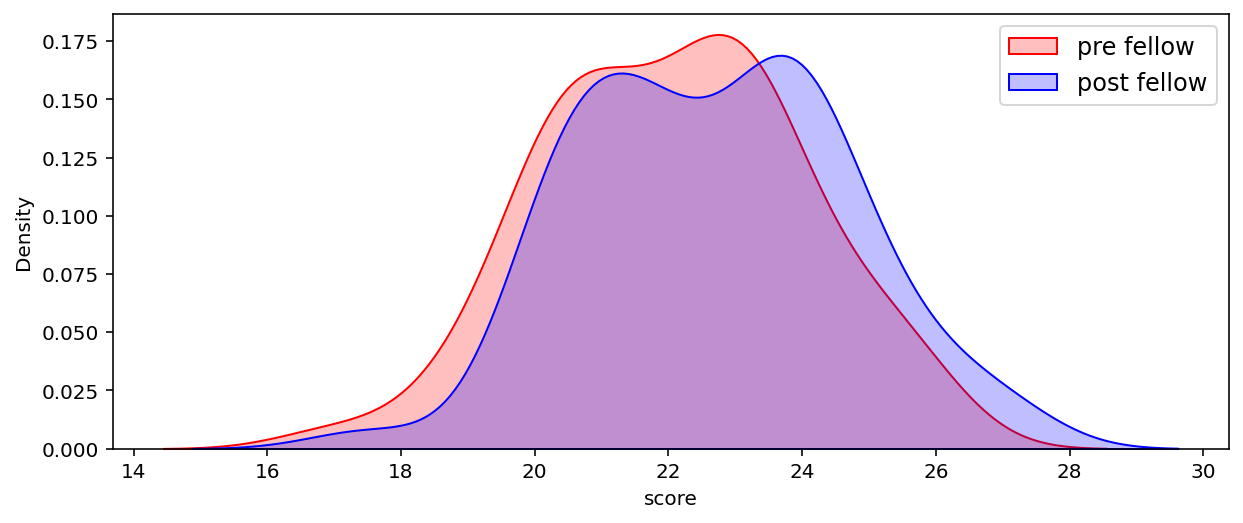

In [75]:
plt.figure(figsize=(10, 4))

sns.kdeplot(df_cane['pre-fel'], color='red', shade=True, label='pre fellow')
sns.kdeplot(df_cane['post-fel'], color='blue', shade=True, label='post fellow')
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('score')
plt.show()

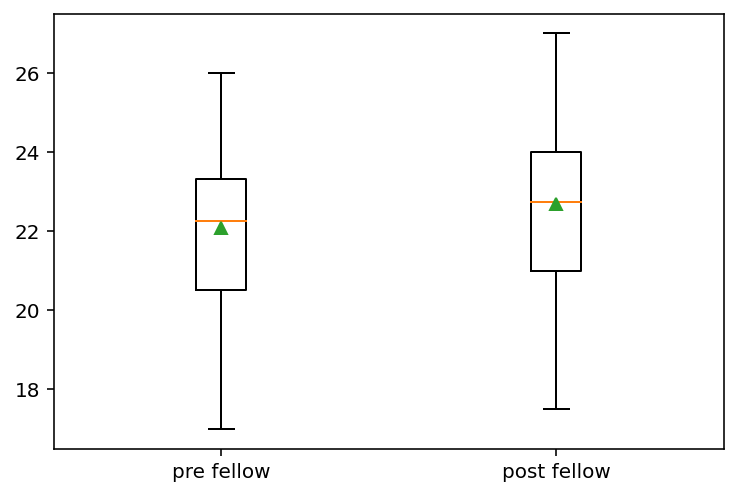

In [54]:
plt.boxplot([df_cane['pre-fel'], df_cane['post-fel']], showmeans=True)
plt.xticks([1, 2], ['pre fellow', 'post fellow'])
plt.show()

In [55]:
stat, p_val = stats.ttest_rel(df_cane['pre-fel'], df_cane['post-fel'], alternative='less')
print('statistic:', stat, '   p-value:', p_val)

statistic: -6.230524342177768    p-value: 2.671085708729617e-08


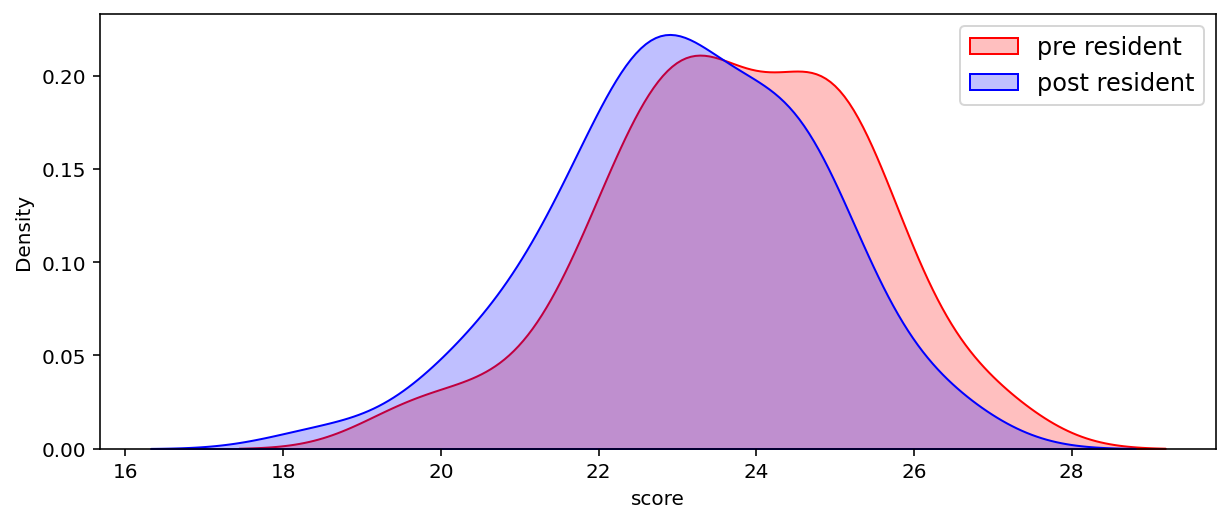

In [74]:
plt.figure(figsize=(10, 4))

sns.kdeplot(df_cane['pre-resi'], color='red', shade=True, label='pre resident')
sns.kdeplot(df_cane['post-resi'], color='blue', shade=True, label='post resident')
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('score')
plt.show()

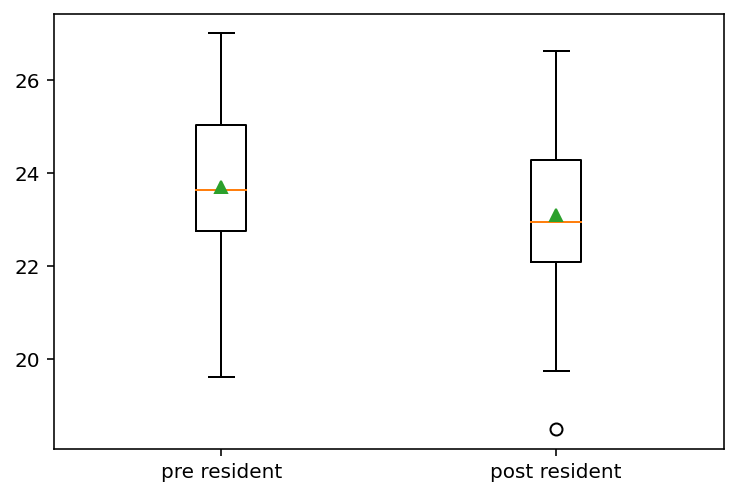

In [56]:
plt.boxplot([df_cane['pre-resi'], df_cane['post-resi']], showmeans=True)
plt.xticks([1, 2], ['pre resident', 'post resident'])
plt.show()

In [57]:
stat, p_val = stats.ttest_rel(df_cane['pre-resi'], df_cane['post-resi'], alternative='less')
print('statistic:', stat, '   p-value:', p_val)

statistic: 10.057505289519682    p-value: 0.9999999999999896


## cane 노출 전, 3개 그룹들의 점수 차이에 대한 유의성 분석
- anova

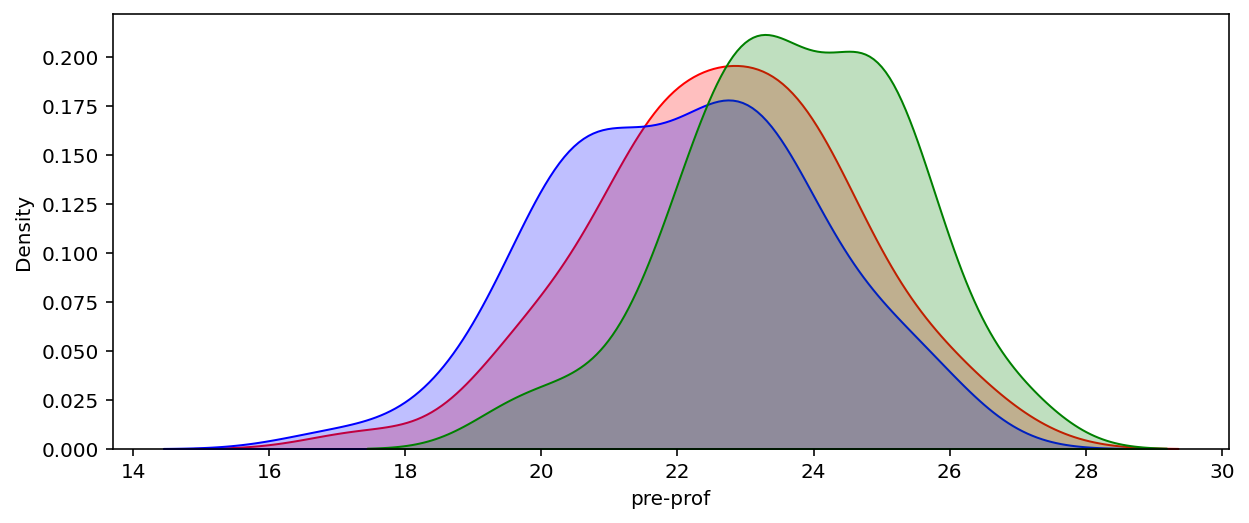

In [68]:
plt.figure(figsize=(10, 4))

sns.kdeplot(df_cane['pre-prof'], color='red', shade=True)
sns.kdeplot(df_cane['pre-fel'], color='blue', shade=True)
sns.kdeplot(df_cane['pre-resi'], color='green', shade=True)
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('score')
plt.show()

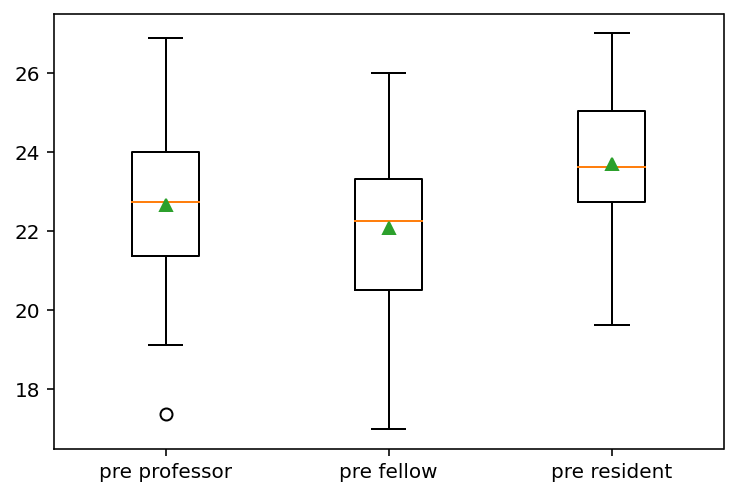

In [58]:
plt.boxplot([df_cane['pre-prof'], df_cane['pre-fel'], df_cane['pre-resi']], showmeans=True)
plt.xticks([1, 2, 3], ['pre professor', 'pre fellow', 'pre resident'])
plt.show()

In [59]:
f_statistic, p_val = stats.f_oneway(df_cane['pre-prof'], df_cane['pre-fel'], df_cane['pre-resi'])
print('statistic:', f_statistic, '   p-value:', p_val)

statistic: 12.329712793733682    p-value: 9.702743260984299e-06


## cane 노출 후, 3개 그룹들의 점수 차이에 대한 유의성 분석
- anova

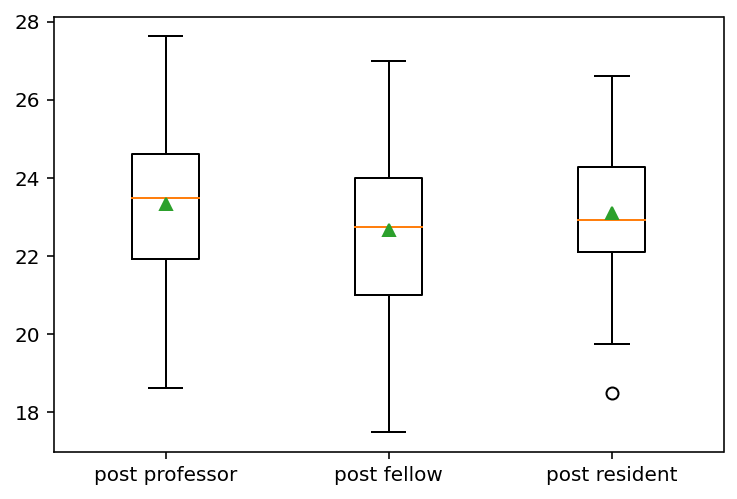

In [60]:
plt.boxplot([df_cane['post-prof'], df_cane['post-fel'], df_cane['post-resi']], showmeans=True)
plt.xticks([1, 2, 3], ['post professor', 'post fellow', 'post resident'])
plt.show()

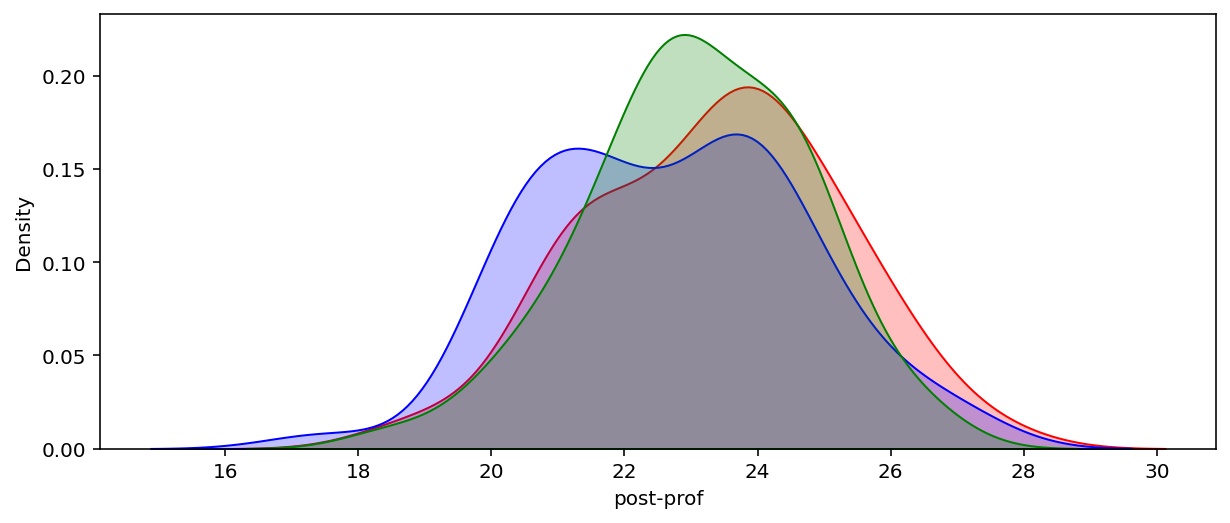

In [67]:
plt.figure(figsize=(10, 4))

sns.kdeplot(df_cane['post-prof'], color='red', shade=True)
sns.kdeplot(df_cane['post-fel'], color='blue', shade=True)
sns.kdeplot(df_cane['post-resi'], color='green', shade=True)
plt.show()

In [61]:
f_statistic, p_val = stats.f_oneway(df_cane['post-prof'], df_cane['post-fel'], df_cane['post-resi'])
print('statistic:', f_statistic, '   p-value:', p_val)

statistic: 1.9723672679944617    p-value: 0.14217312922540504


## cane 노출 전, 2개 그룹의 점수 차이에 대한 유의성 분석
- t-test

In [ ]:
stat, p_val = stats.ttest_ind(df_cane['pre-prof'], df_cane['post-prof'], alternative='less')
print('statistic:', stat, '   p-value:', p_val)